In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('./csv파일/데이터셋_1.csv',encoding='cp949')

# 빈도분석 결과를 토대로 필요없는 컬럼 삭제 진행

In [25]:
df = df.drop(['요일','사고내용','가해자성별','피해자성별','연령피해자','가해자음주','신체상해정도가해자','신체상해정도피해자','가해자신체상해주부위','노인보호구역_여부','어린이보호구역_여부','자전거도로_여부','기상상태','노면상태','교차로형태','사망자수','중상자수','경상자수','부상신고자수','가해자차량용도'],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고유형         58059 non-null  object
 1   연령가해자        58059 non-null  int64 
 2   법규위반가해자      58059 non-null  object
 3   행동유형가해자      58059 non-null  object
 4   피해자신체상해주부위   58059 non-null  object
 5   차량용도가해자_중분류  58059 non-null  object
 6   도로종류         58059 non-null  object
 7   도로형태         58059 non-null  object
 8   도로선형         58059 non-null  object
 9   발생시각         58059 non-null  int64 
 10  EPDO1        58059 non-null  int64 
 11  EPDO2        58059 non-null  int64 
 12  심각도          58059 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.8+ MB


In [27]:
df['발생시각'].unique()

array([15,  9, 19, 11, 12, 21, 17, 16, 13, 14, 18,  8, 10, 20,  6,  4,  7,
       22,  2,  3,  5, 23,  1,  0], dtype=int64)

# 빈도분석과 PointPlot 결과를 토대로 <연령가해자> 카테고리화

In [28]:
for i in range(len(df)):
    if df.iloc[i,1]==0:
        df.iloc[i,1]='기타/불명'
    elif 1<=df.iloc[i,1]<=20:
        df.iloc[i,1]='20세이하'
    elif 21<=df.iloc[i,1]<=30:
        df.iloc[i,1]='21-30세'
    elif 31<=df.iloc[i,1]<=40:
        df.iloc[i,1]='31-40세'
    elif 41<=df.iloc[i,1]<=50:
        df.iloc[i,1]='41-50세'
    elif 51<=df.iloc[i,1]<=60:
        df.iloc[i,1]='51-60세'
    elif 61<=df.iloc[i,1]<=64:
        df.iloc[i,1]='61-64세'
    elif 65<=df.iloc[i,1]:
        df.iloc[i,1]='65세이상'

## 발생시각도 묶어서 카테고리화
### 사고 심각도에 가장 큰 영향을 끼치는 시간대인 02-04시를 기준으로 3시간 씩 묶어서 카테고리화

In [29]:
for i in range(len(df)):
    if 2<=df.iloc[i,9]<=4:
        df.iloc[i,9]='02-04시'
    elif 5<=df.iloc[i,9]<=7:
        df.iloc[i,9]='05-07시'
    elif 8<=df.iloc[i,9]<=10:
        df.iloc[i,9]='08-10시'
    elif 11<=df.iloc[i,9]<=13:
        df.iloc[i,9]='11-13시'
    elif 14<=df.iloc[i,9]<=16:
        df.iloc[i,9]='14-16시'
    elif 17<=df.iloc[i,9]<=19:
        df.iloc[i,9]='17-19시'
    elif 20<=df.iloc[i,9]<=22:
        df.iloc[i,9]='20-22시'
    elif 23<=df.iloc[i,9]<=24:
        df.iloc[i,9]='23-01시'
    elif df.iloc[i,9]==0:
        df.iloc[i,9]='23-01시'  
    elif df.iloc[i,9]==1:
        df.iloc[i,9]='23-01시' 

In [30]:
df['발생시각'].unique()

array(['14-16시', '08-10시', '17-19시', '11-13시', '20-22시', '05-07시',
       '02-04시', '23-01시'], dtype=object)

In [31]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자_중분류,도로종류,도로형태,도로선형,발생시각,EPDO1,EPDO2,심각도
0,보도통행중,20세이하,안전운전 의무 불이행,직진중,하퇴부,자전거,기타,단일로,평지,14-16시,2,3,0
1,횡단중,65세이상,안전운전 의무 불이행,직진중,머리,승용차,시도,단일로,평지,08-10시,32,6,1
2,길가장자리구역통행중,20세이하,안전운전 의무 불이행,직진중,기타,승용차,시도,단일로,평지,17-19시,2,3,0
3,길가장자리구역통행중,21-30세,안전운전 의무 불이행,후진중,기타,화물차,기타,단일로,평지,11-13시,32,6,1
4,횡단중,41-50세,안전운전 의무 불이행,직진중,머리,승용차,기타,단일로,평지,11-13시,32,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58054,길가장자리구역통행중,51-60세,안전운전 의무 불이행,직진중,팔,승용차,시도,단일로,평지,14-16시,2,3,0
58055,보도통행중,21-30세,기타,후진중,팔,승용차,군도,교차로,평지,17-19시,2,3,0
58056,차도통행중,31-40세,안전운전 의무 불이행,직진중,발,승용차,군도,단일로,평지,08-10시,32,6,1
58057,기타,65세이상,안전운전 의무 불이행,직진중,하퇴부,승용차,시도,단일로,평지,08-10시,32,6,1


---

---

## ■ 데이터셋_2 완성

In [32]:
df.to_csv('./csv파일/데이터셋_2.csv',encoding='cp949')

---

## ■ 데이터셋_2(EPDO1) 완성

In [33]:
df1 = df

df1 = df1.drop(['EPDO2','심각도'],axis=1)

In [34]:
df1.to_csv('./csv파일/데이터셋_2(EPDO1).csv',encoding='cp949')

---

## ■ 데이터셋_2(EPDO2) 완성

In [35]:
df2 = df

df2 = df2.drop(['EPDO1','심각도'],axis=1)

In [36]:
df2.to_csv('./csv파일/데이터셋_2(EPDO2).csv',encoding='cp949')

---

## ■ 데이터셋_2(심각도) 완성

In [37]:
df3 = df

df3 = df3.drop(['EPDO1','EPDO2'],axis=1)

In [38]:
df3.to_csv('./csv파일/데이터셋_2(심각도).csv',encoding='cp949')

---

---

# ■ 라벨링 정리

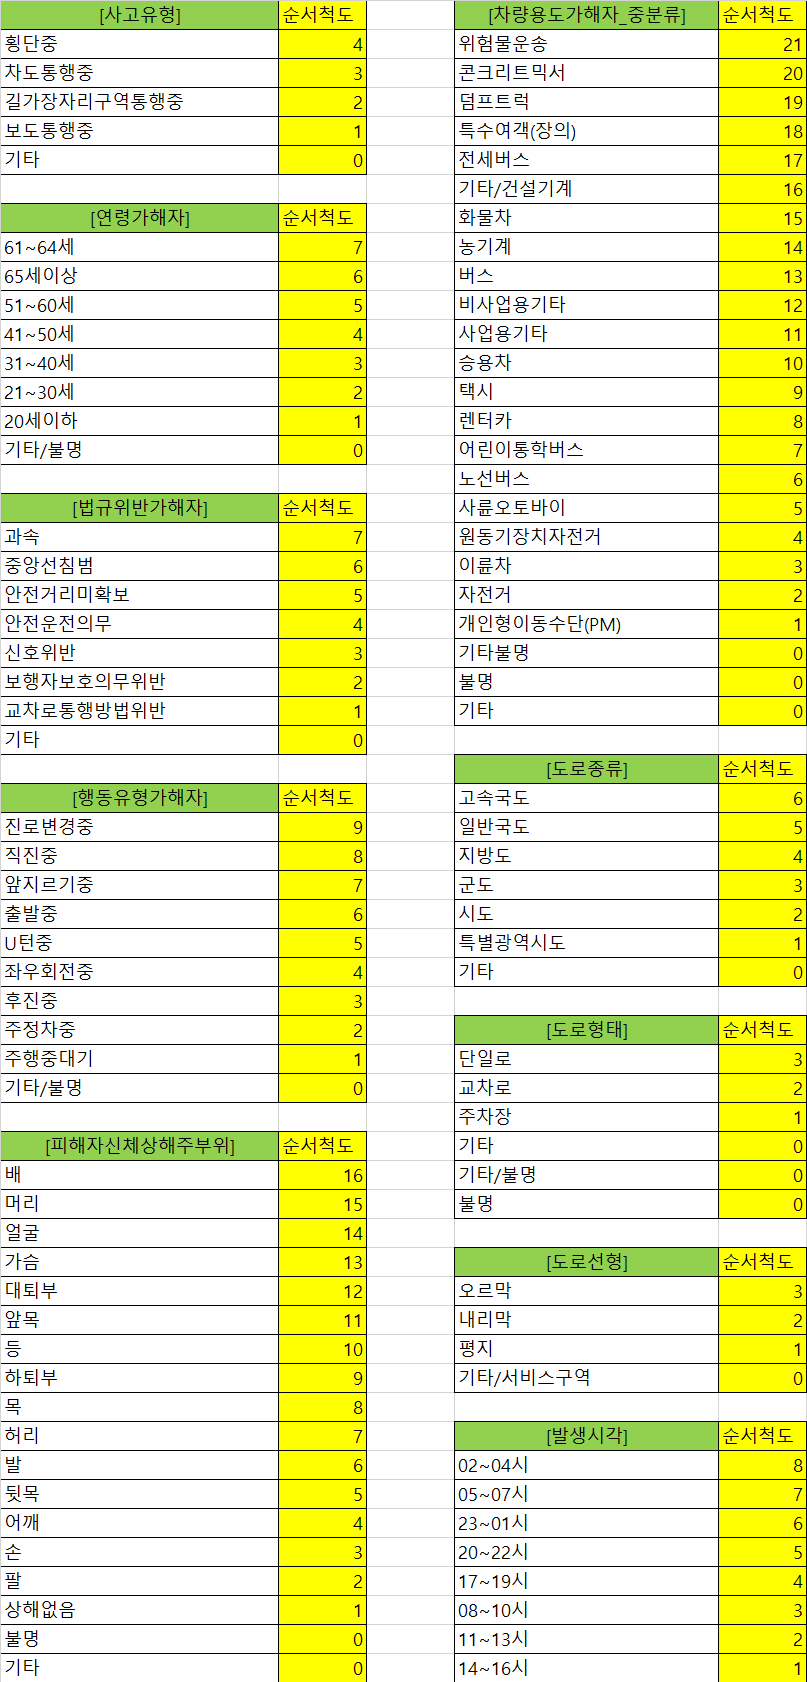

# 연령가해자와 발생시각 카테고리화했으므로 PointPlot 다시 출력
##  라벨링하기위해 필요한 것만 계속 다시 출력

In [56]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [57]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [121]:
old_pedestrian = pd.read_csv('./csv파일/데이터셋_2.csv',encoding='cp949')
df = pd.read_csv('./csv파일/데이터셋_2.csv',encoding='cp949')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고유형         58059 non-null  object
 1   연령가해자        58059 non-null  object
 2   법규위반가해자      58059 non-null  object
 3   행동유형가해자      58059 non-null  object
 4   피해자신체상해주부위   58059 non-null  object
 5   차량용도가해자_중분류  58059 non-null  object
 6   도로종류         58059 non-null  object
 7   도로형태         58059 non-null  object
 8   도로선형         58059 non-null  object
 9   발생시각         58059 non-null  object
 10  EPDO1        58059 non-null  int64 
 11  EPDO2        58059 non-null  int64 
 12  심각도          58059 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 5.8+ MB


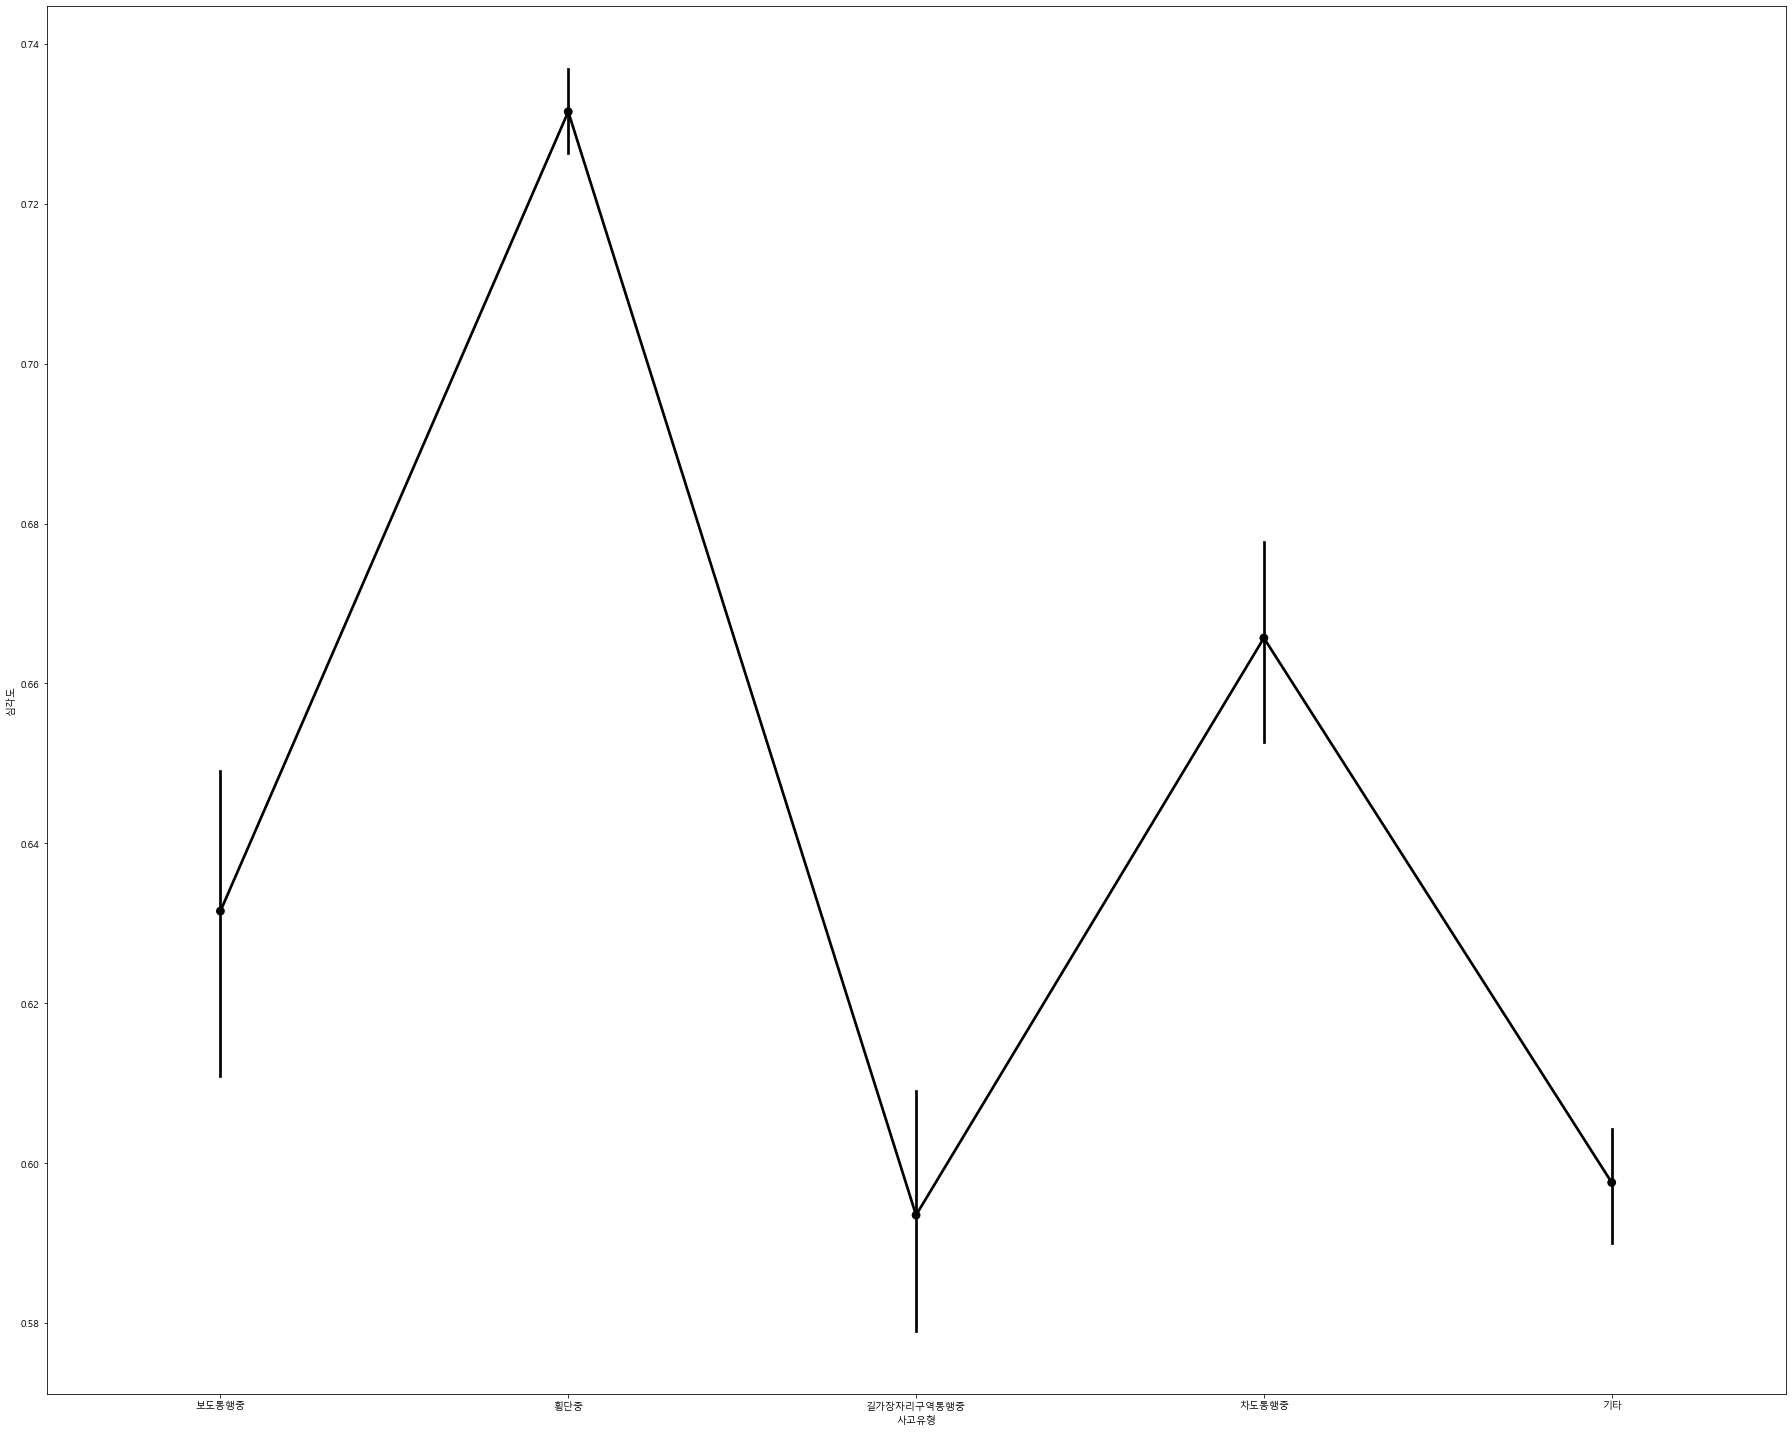

In [60]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))

sns.pointplot(x='사고유형',y='심각도', data=old_pedestrian, ax=ax1,color='black')

plt.tight_layout()
plt.show()

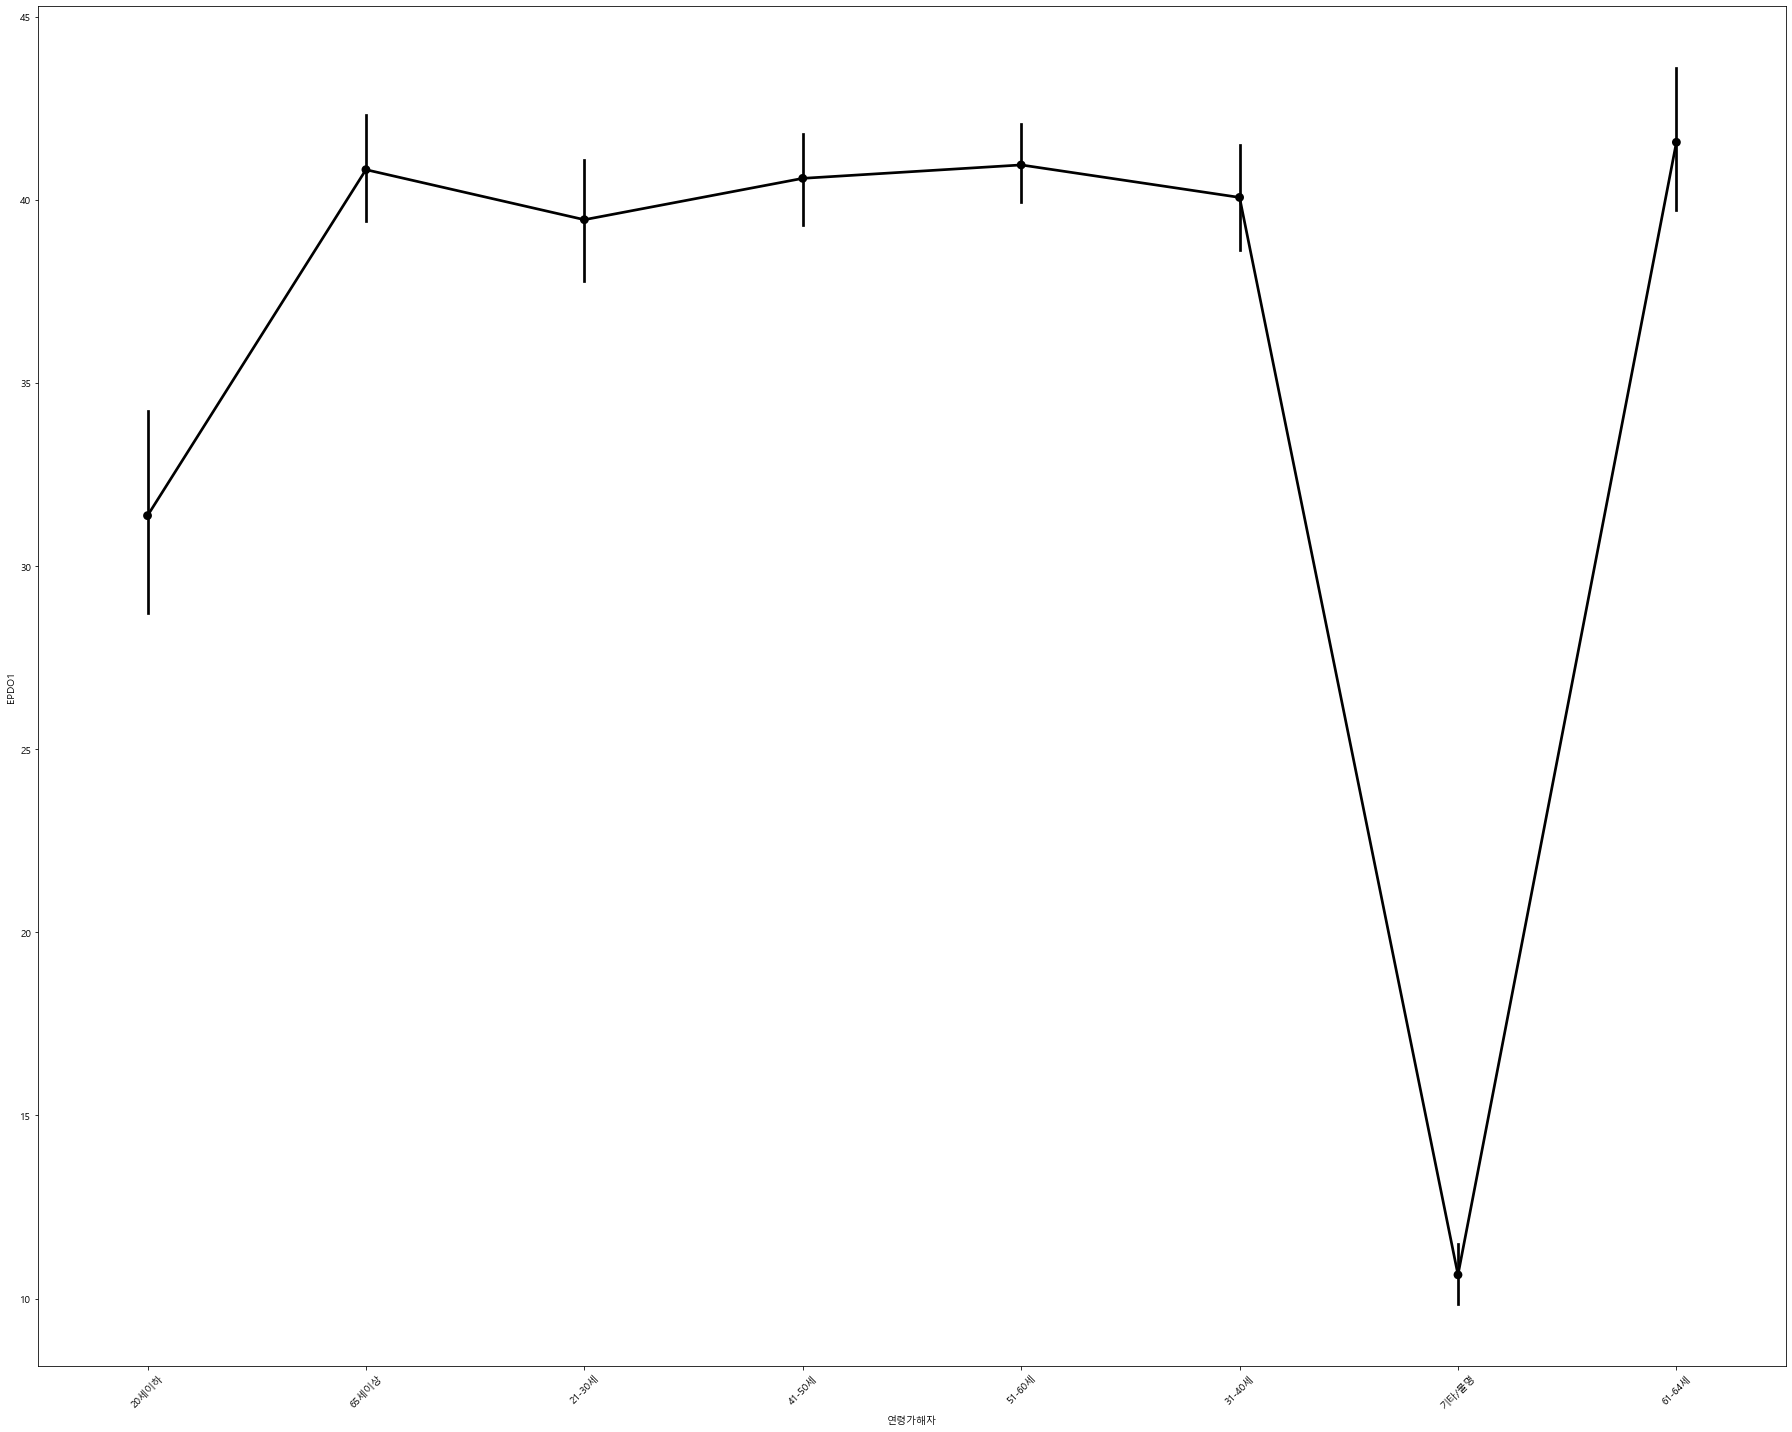

In [61]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='연령가해자',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

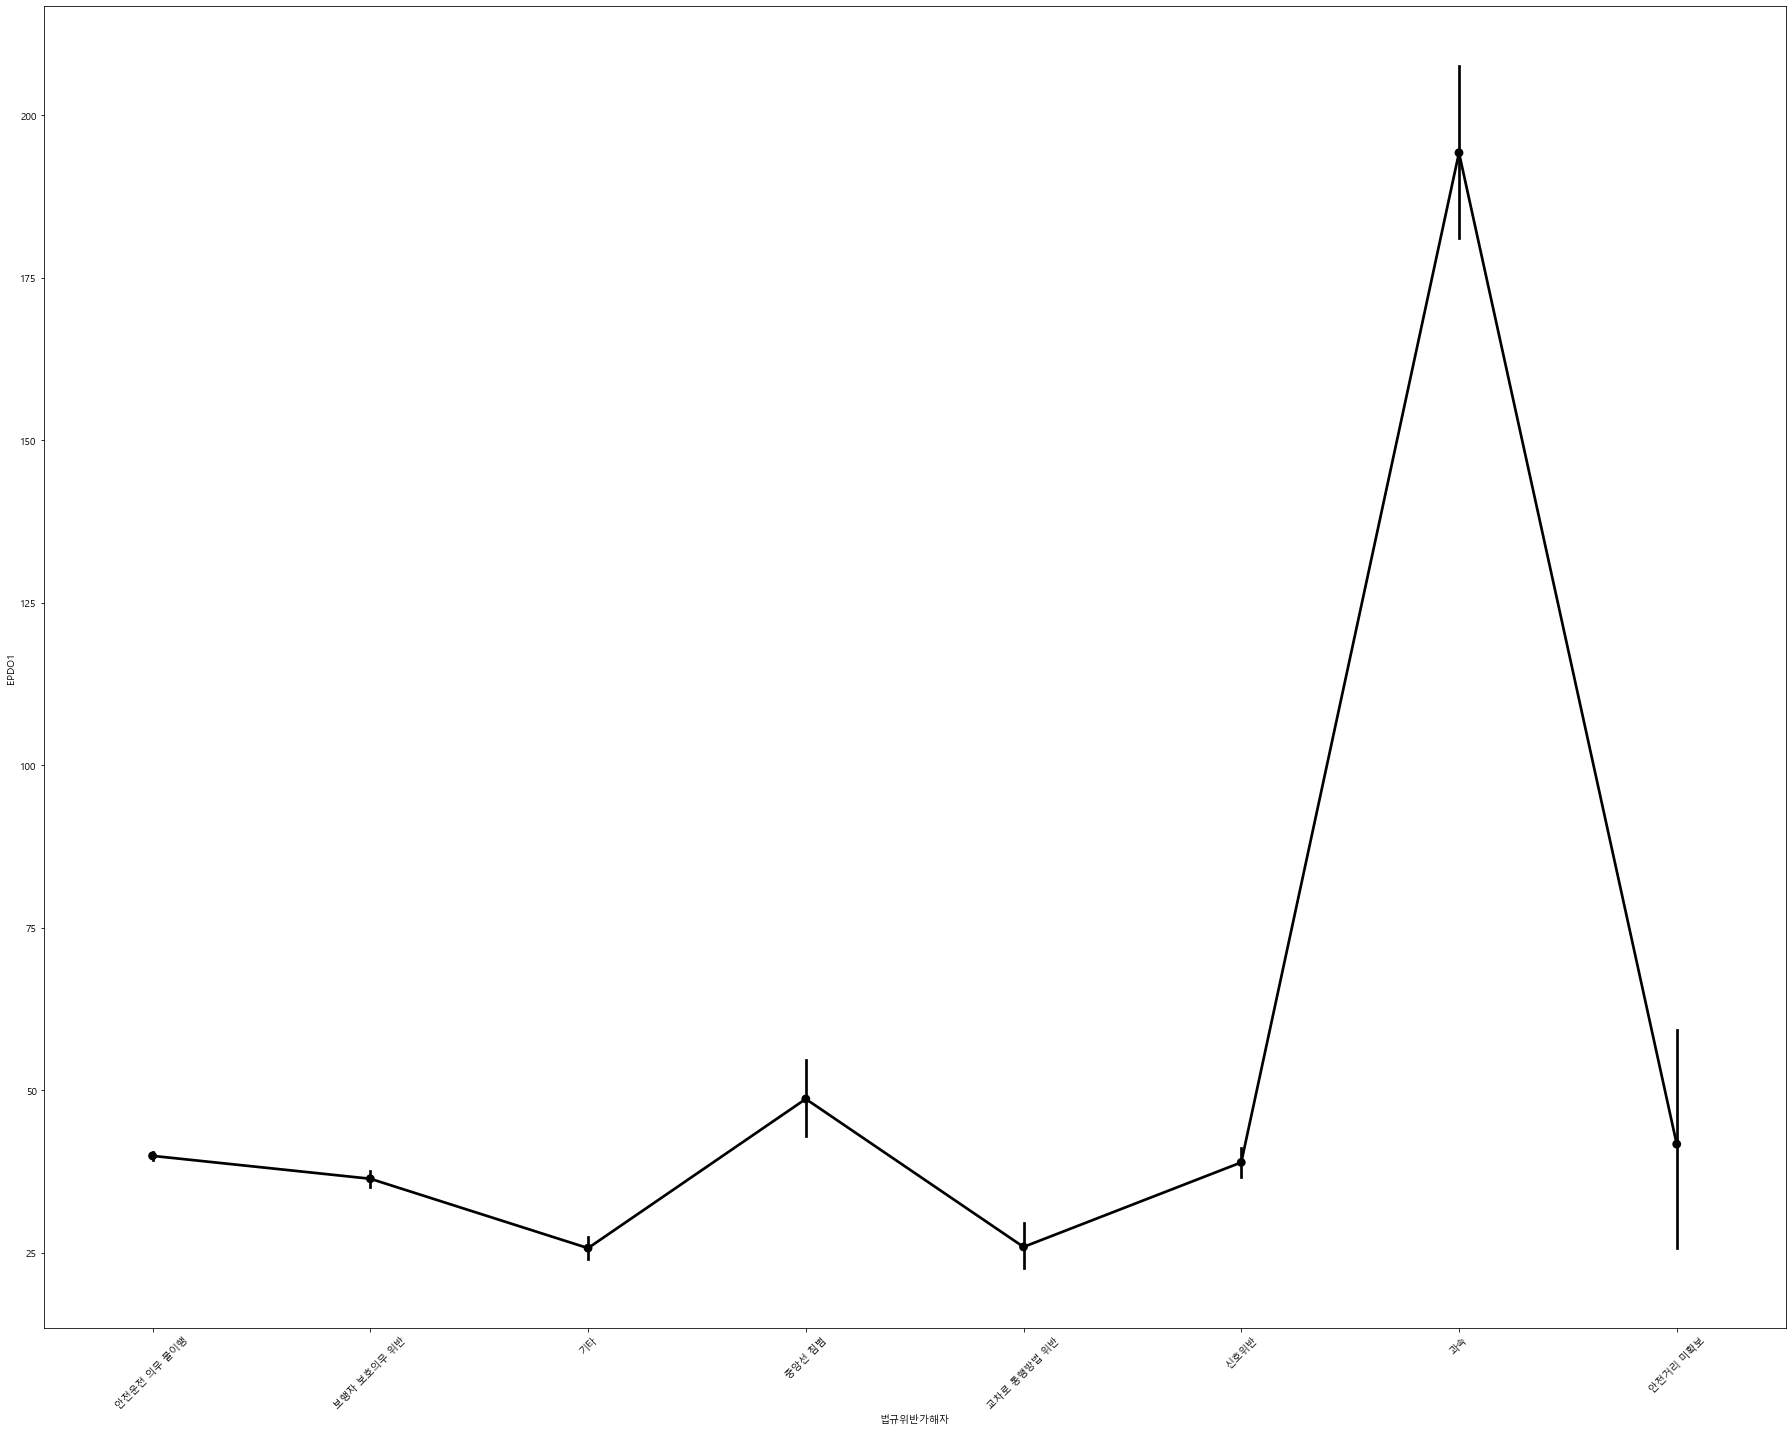

In [62]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='법규위반가해자',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

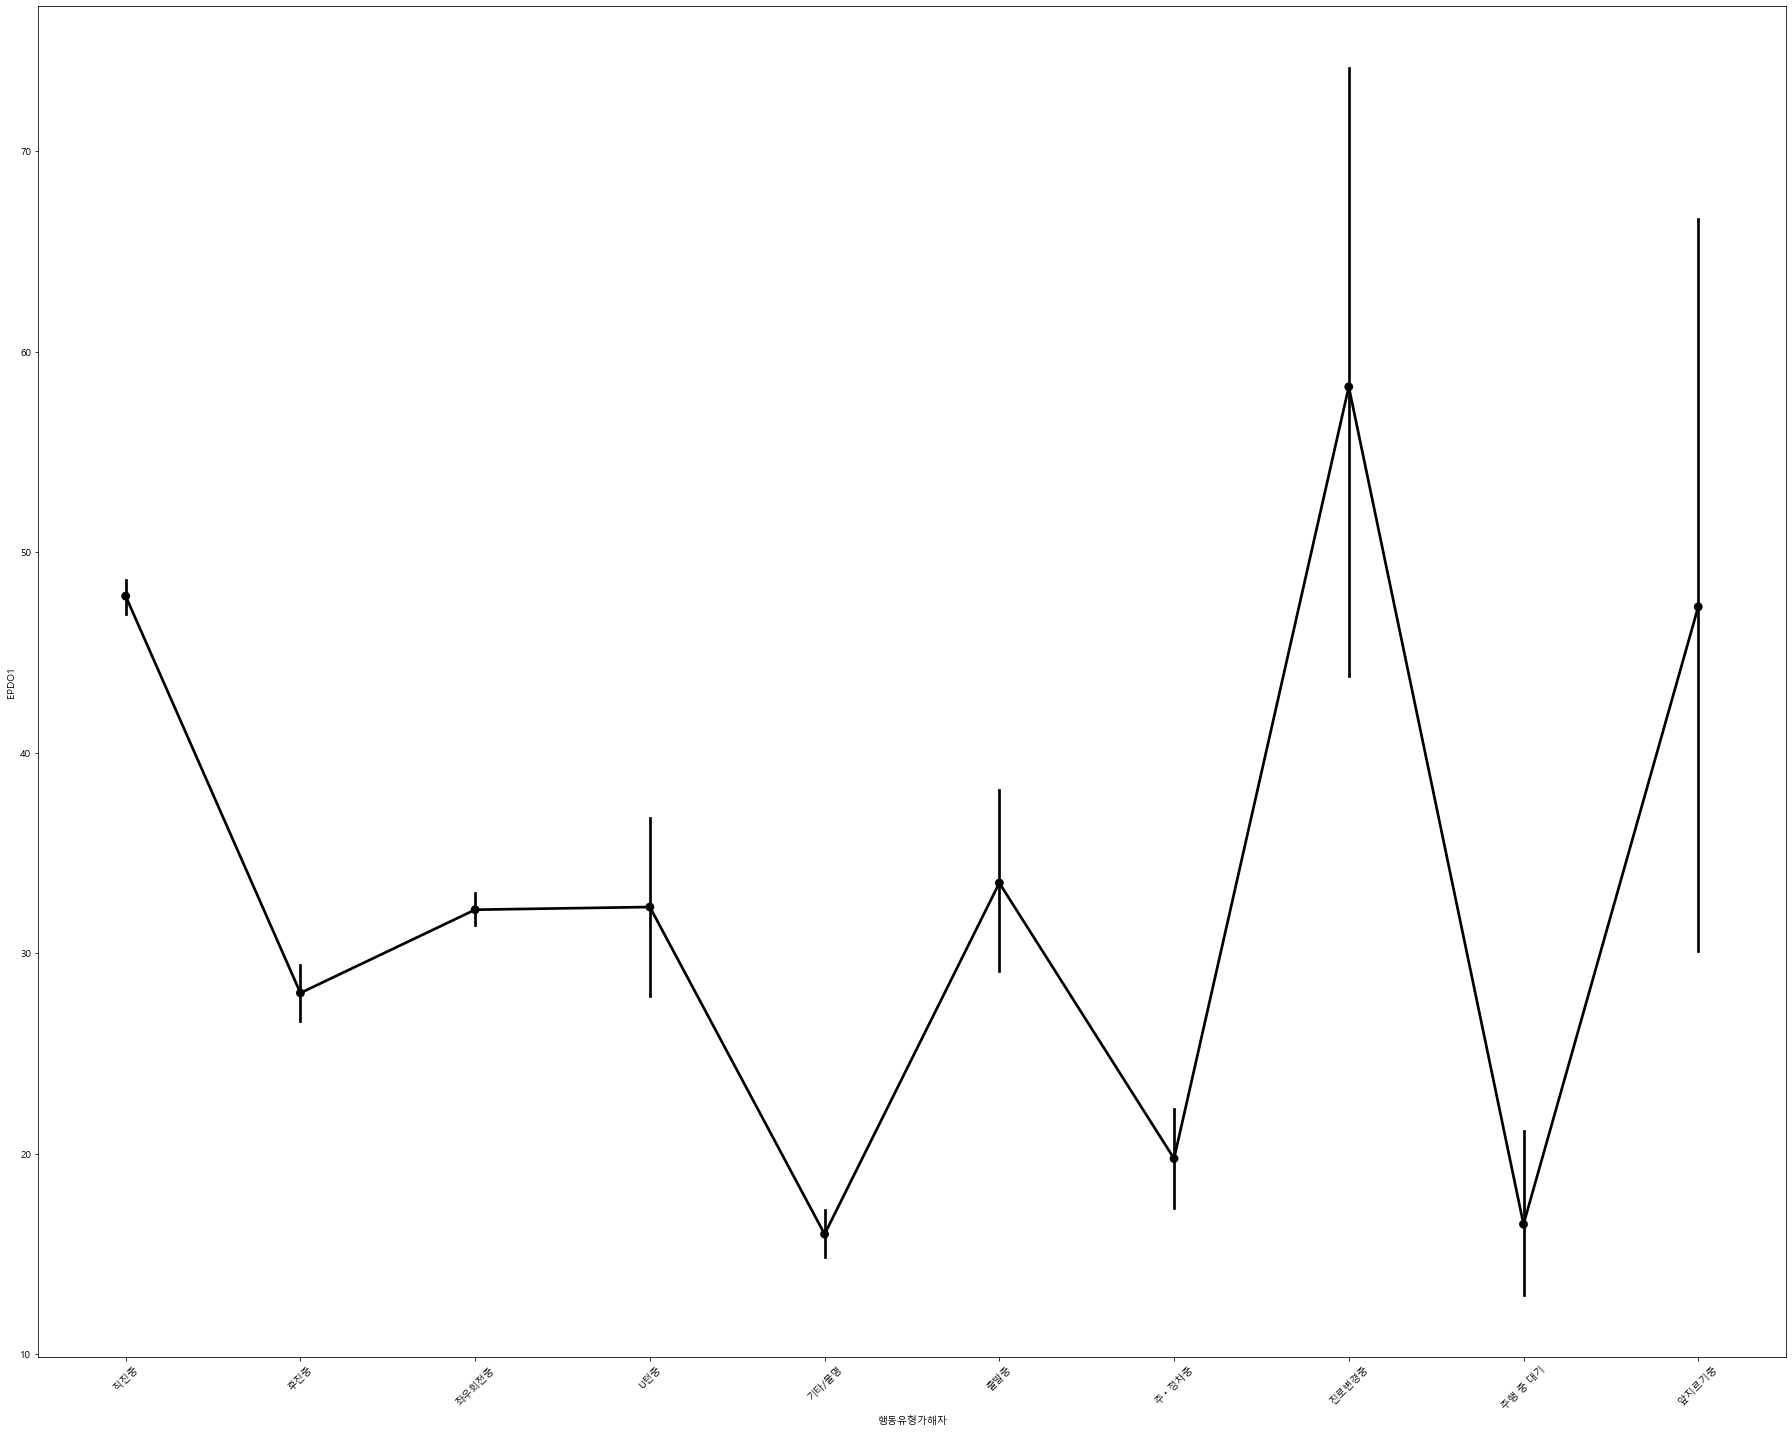

In [63]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='행동유형가해자',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

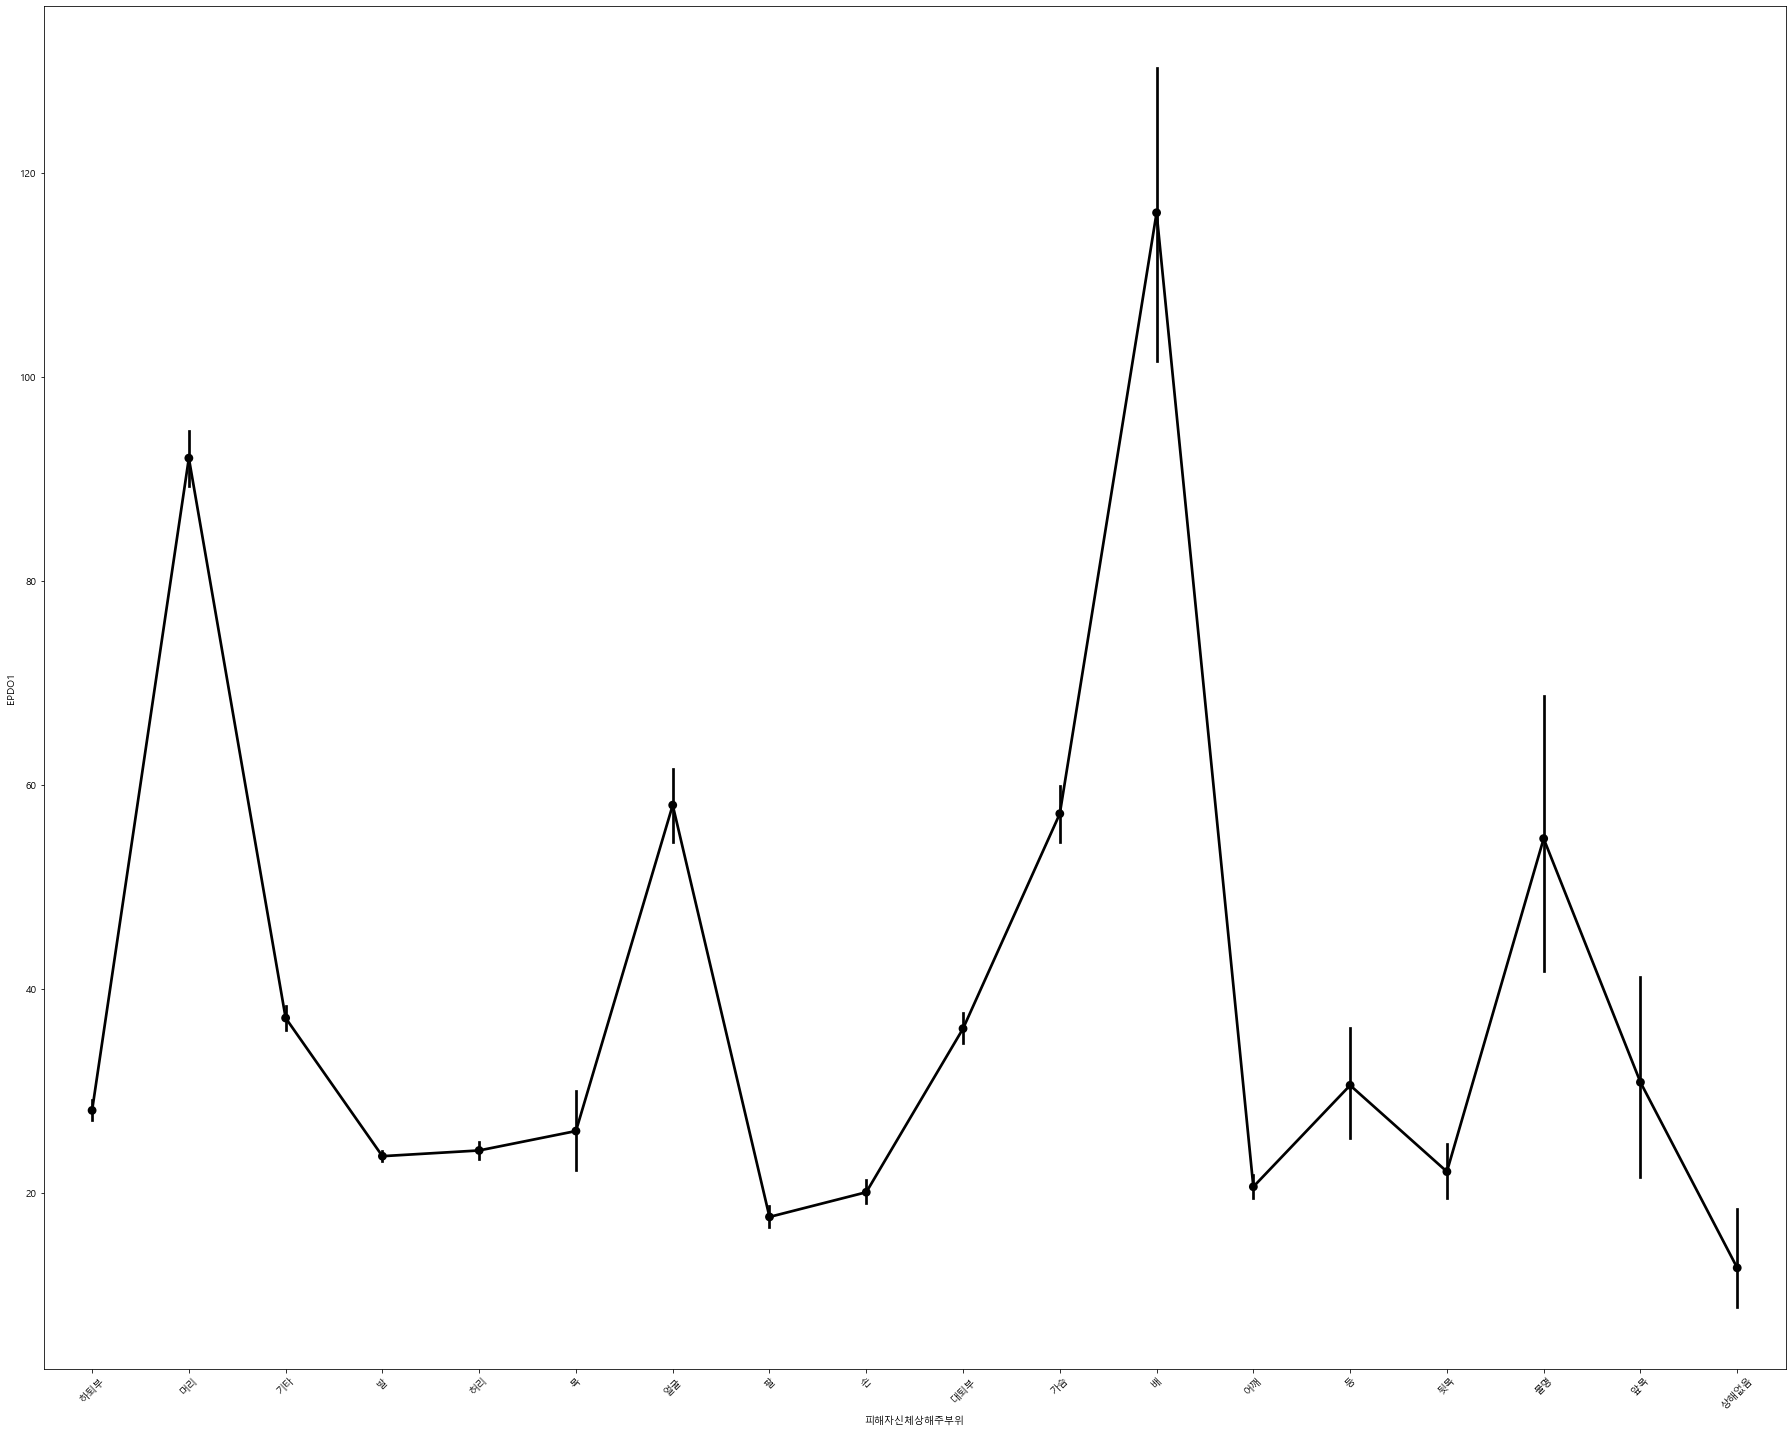

In [64]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='피해자신체상해주부위',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

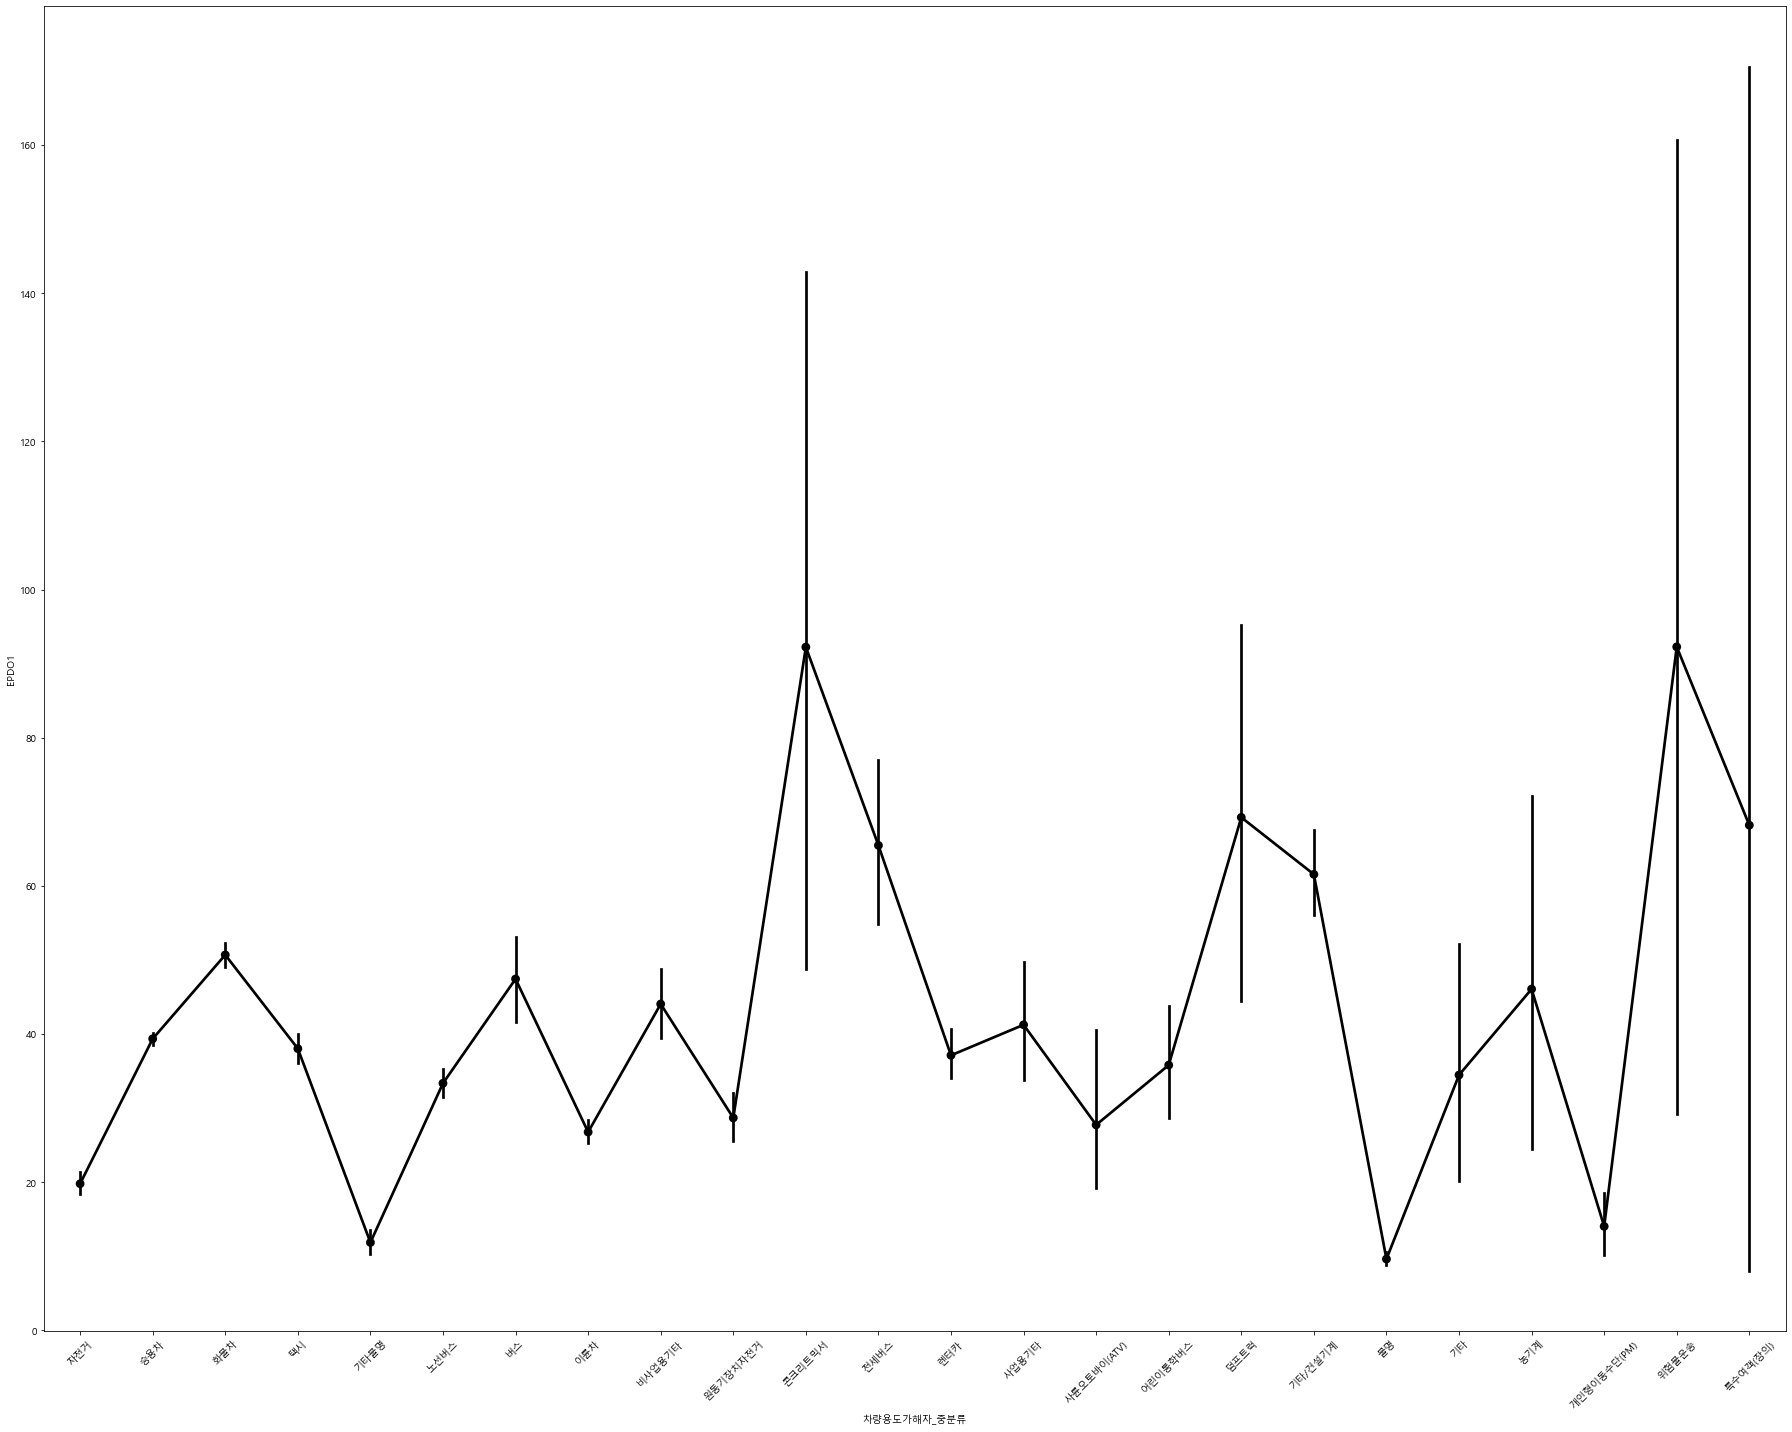

In [65]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='차량용도가해자_중분류',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

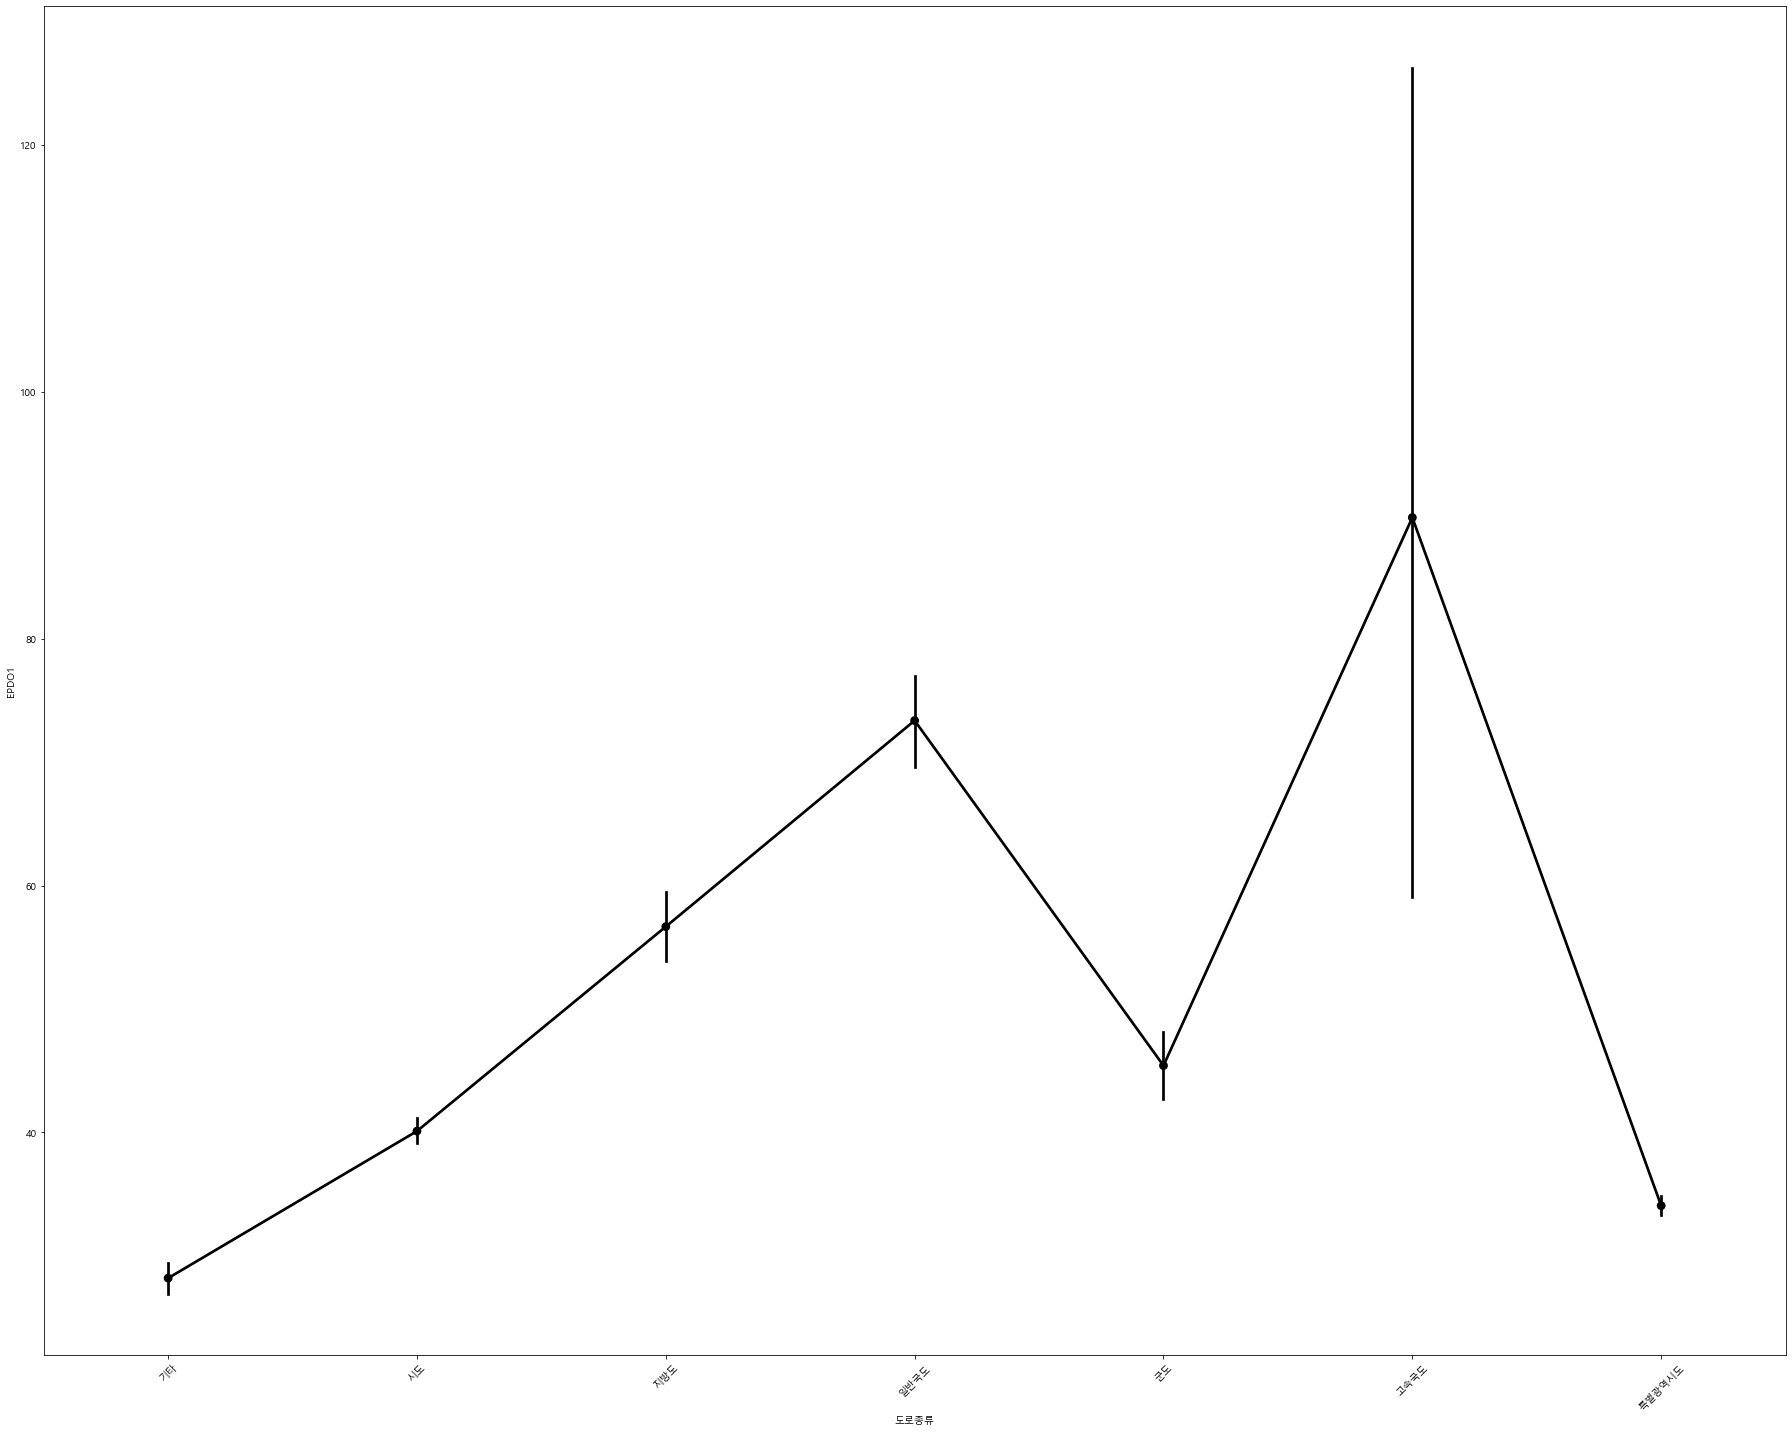

In [66]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='도로종류',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

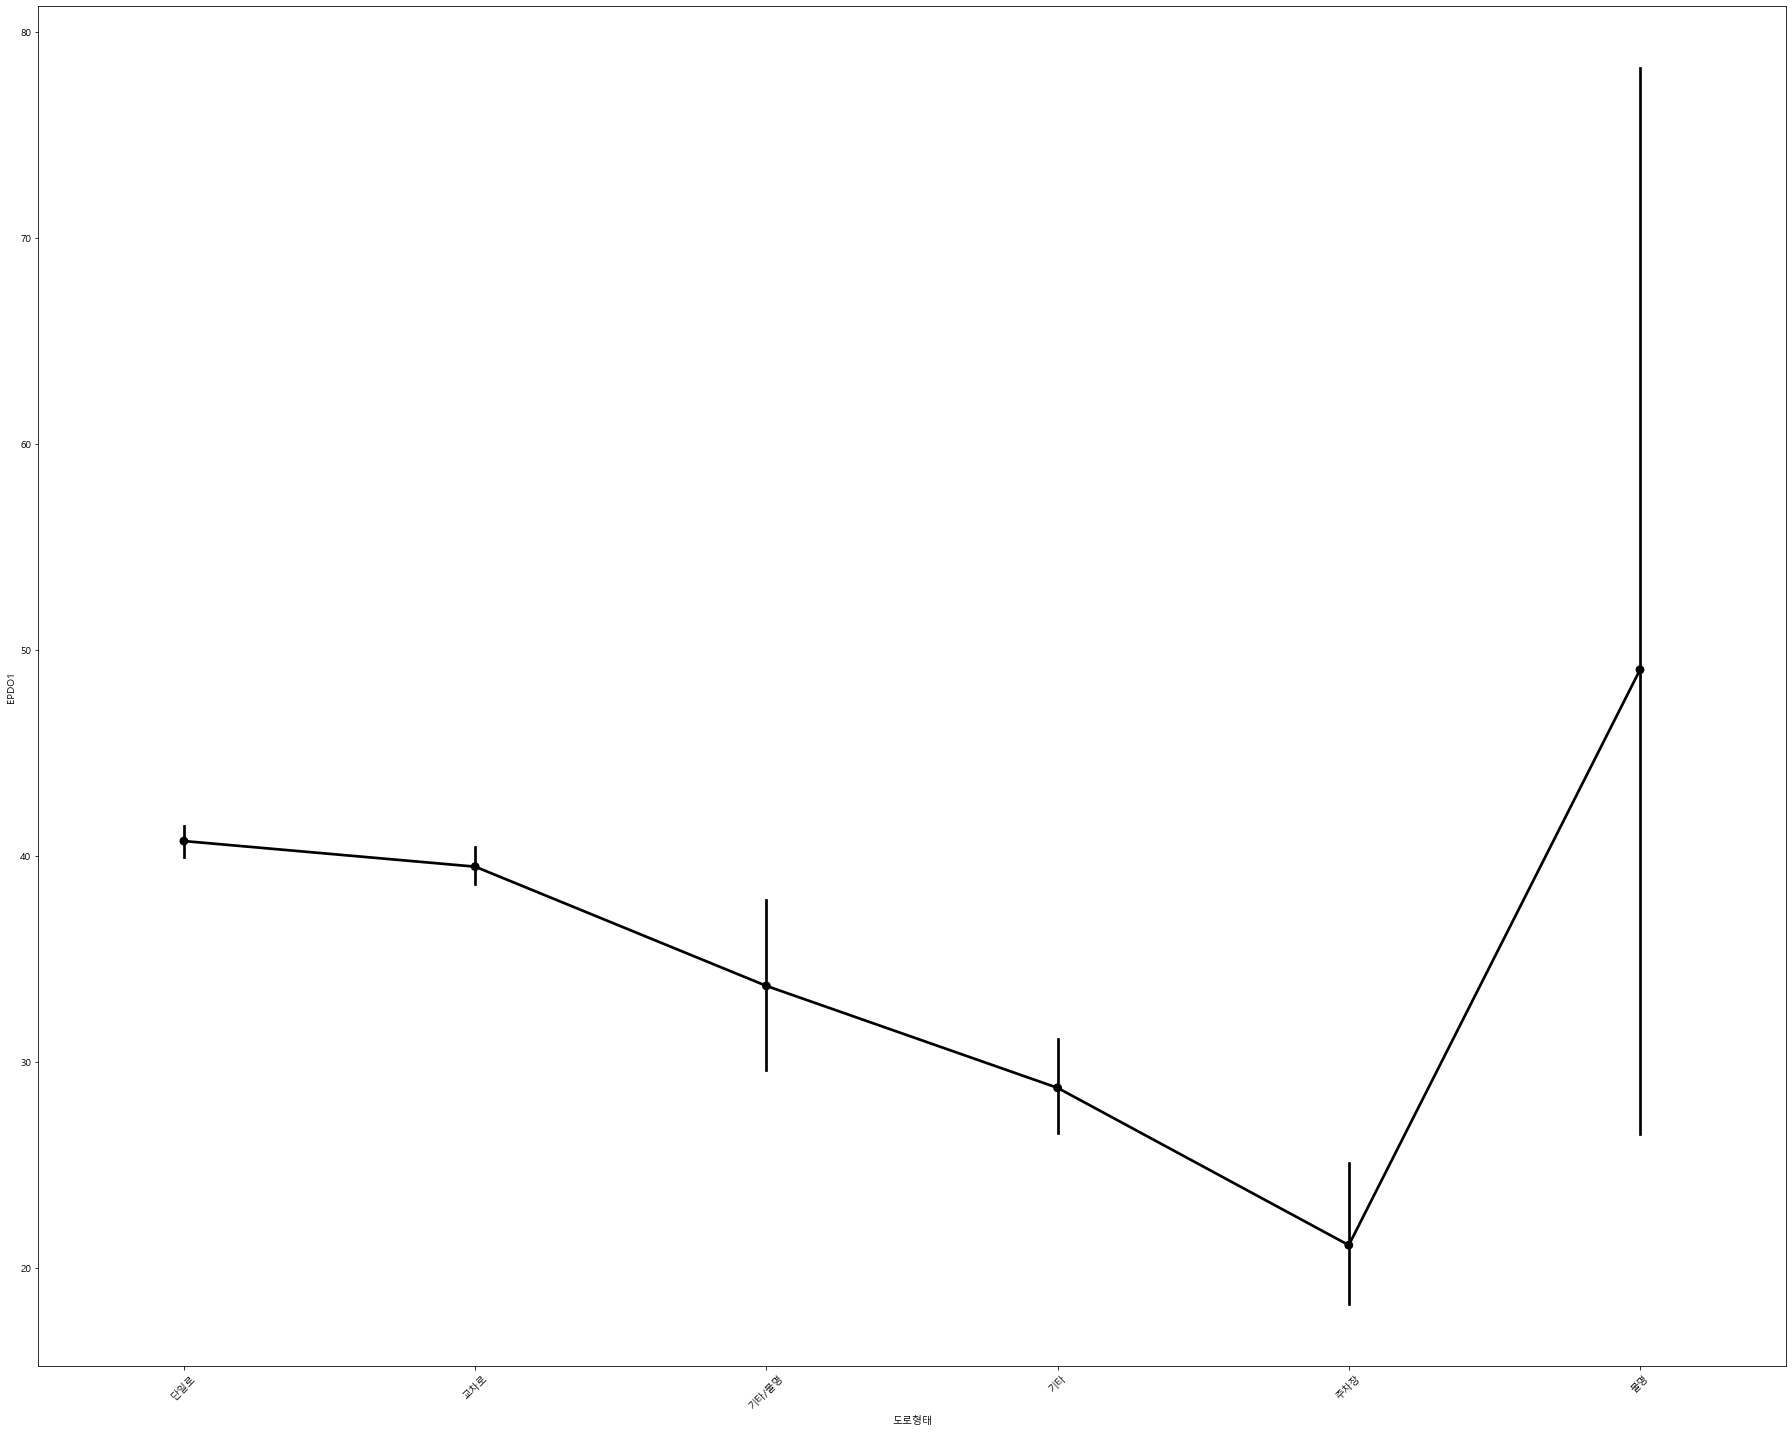

In [67]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='도로형태',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

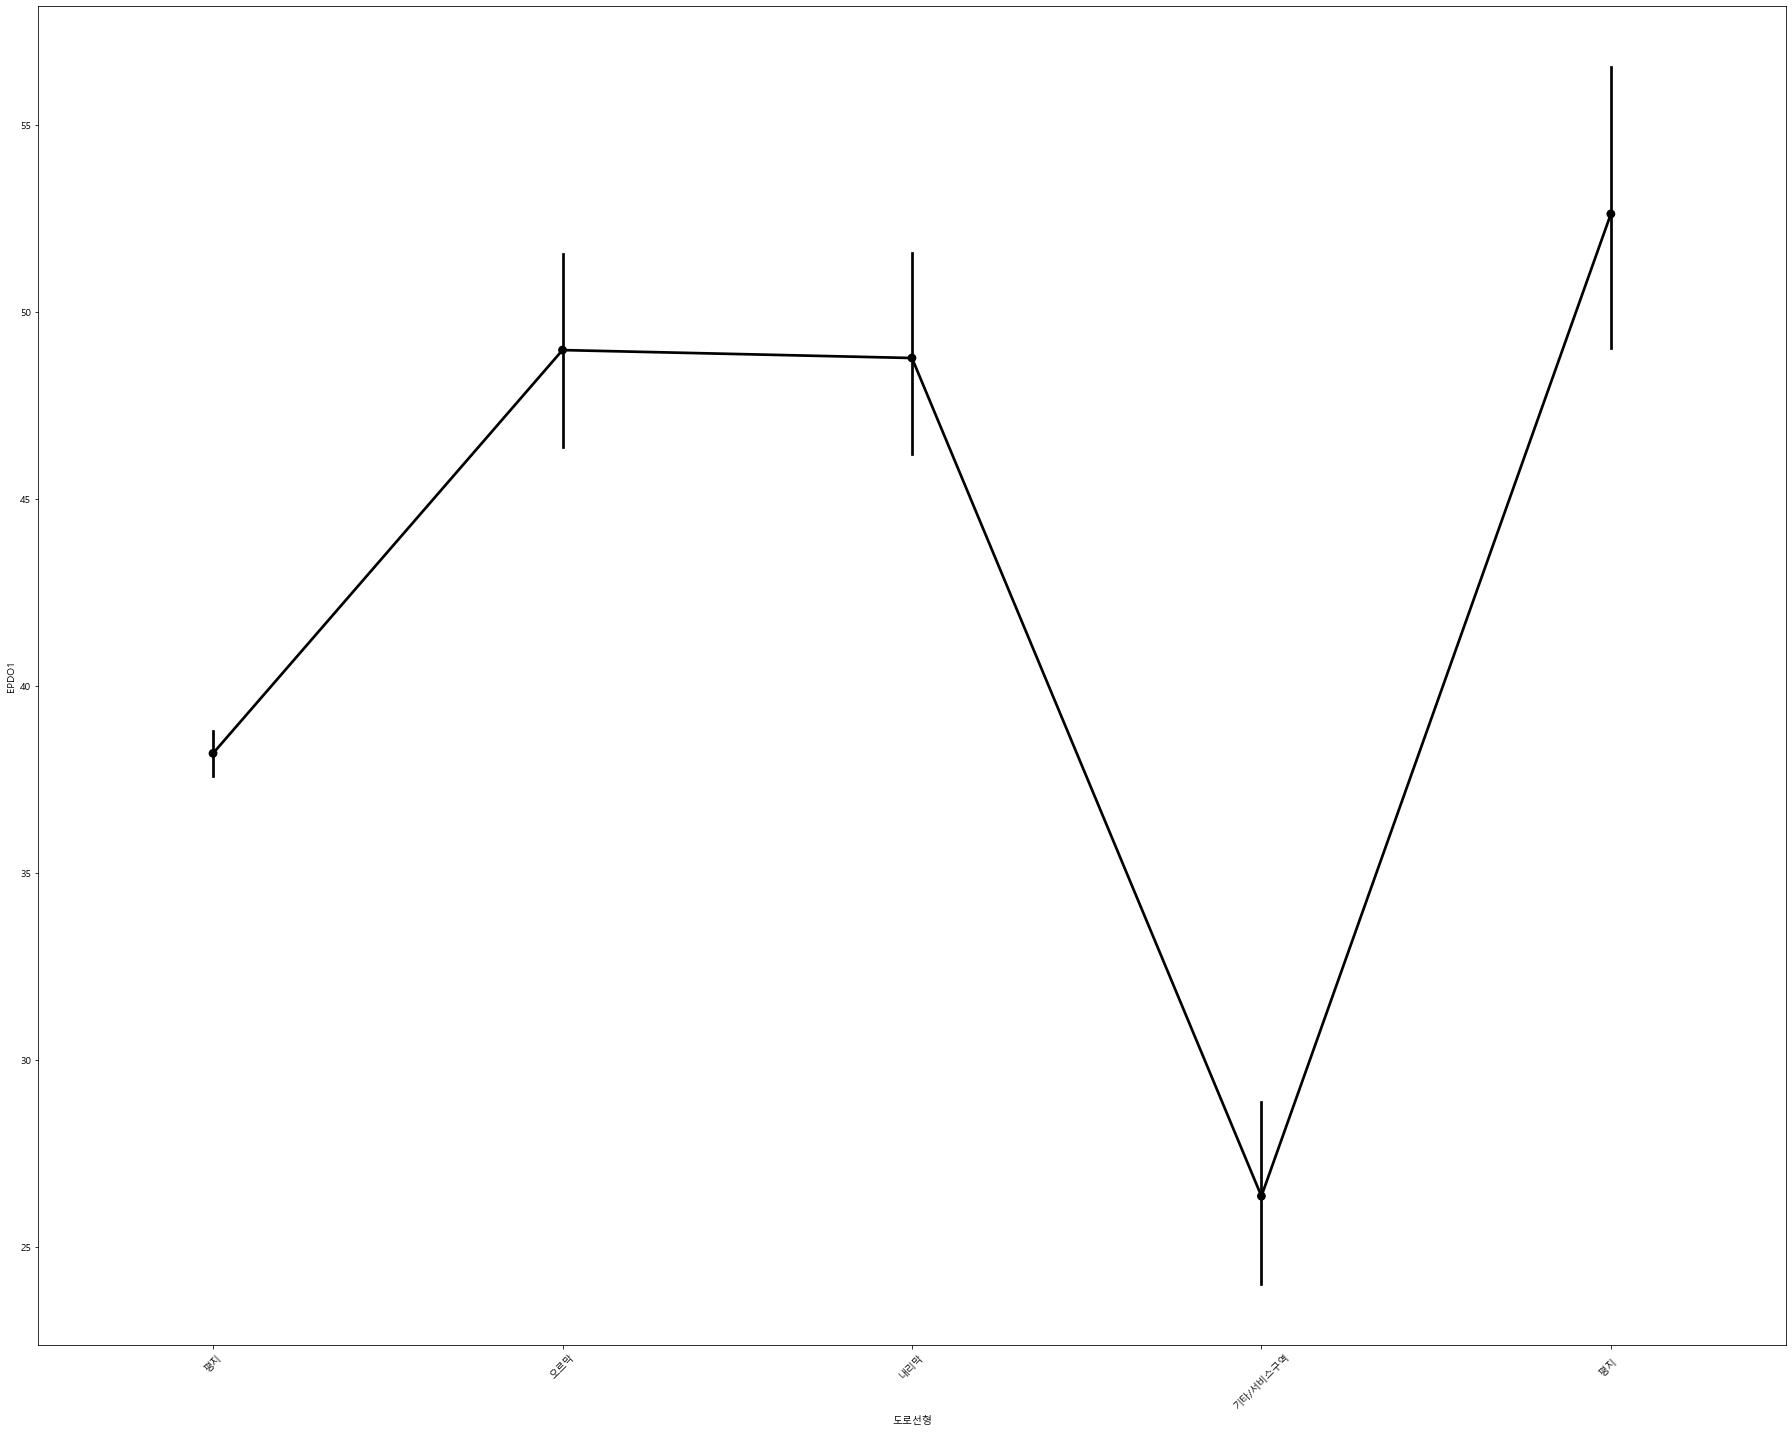

In [76]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))

sns.pointplot(x='도로선형',y='EPDO1', data=old_pedestrian, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

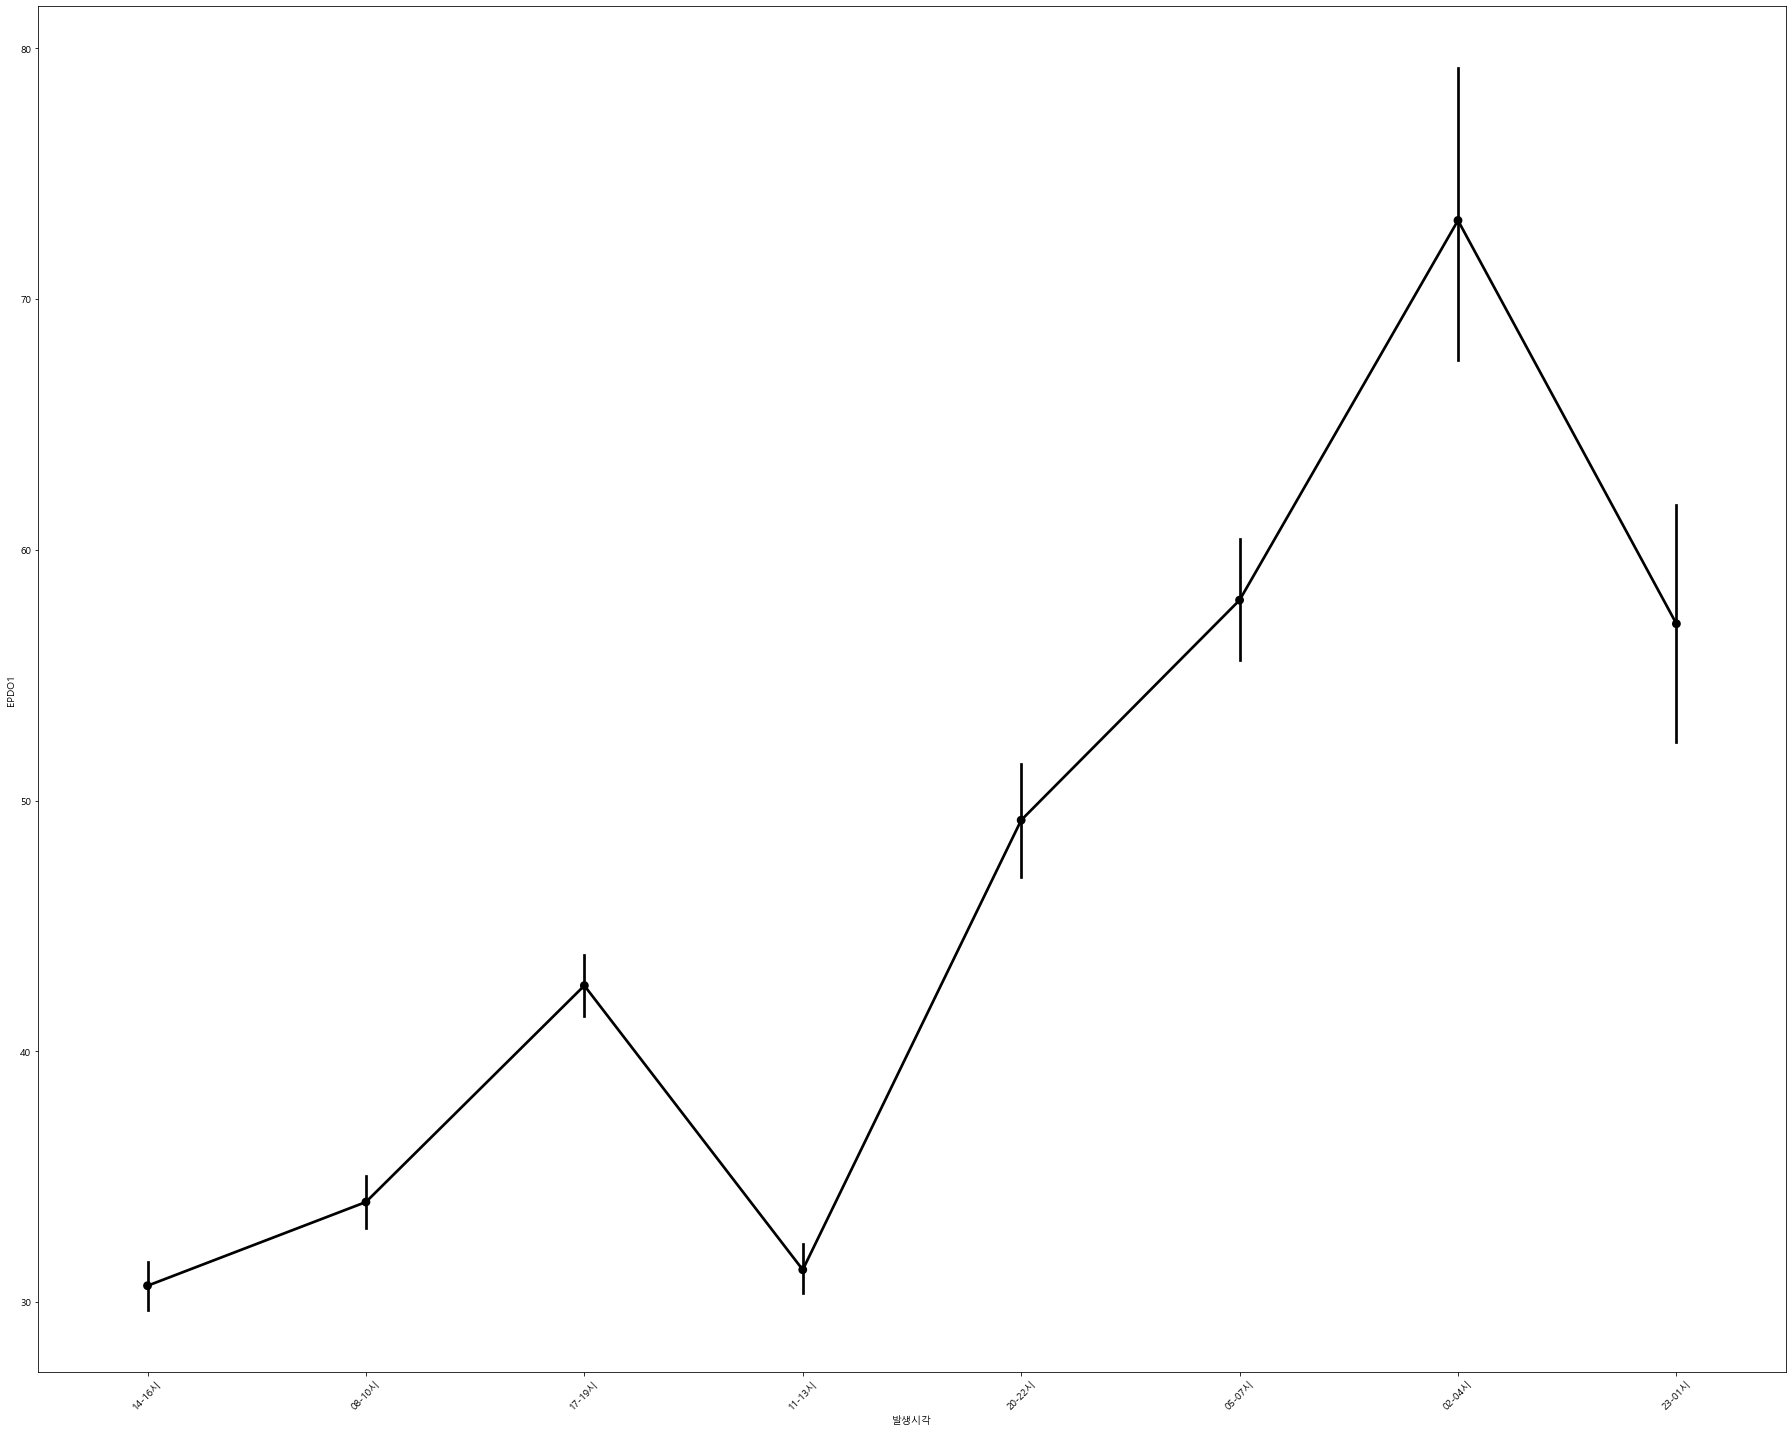

In [77]:
fig, (ax1) = plt.subplots(1,1,figsize=(25,20))


sns.pointplot(x='발생시각',y='EPDO1', data=df, ax=ax1,color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고유형         58059 non-null  object
 1   연령가해자        58059 non-null  object
 2   법규위반가해자      58059 non-null  object
 3   행동유형가해자      58059 non-null  object
 4   피해자신체상해주부위   58059 non-null  object
 5   차량용도가해자_중분류  58059 non-null  object
 6   도로종류         58059 non-null  object
 7   도로형태         58059 non-null  object
 8   도로선형         58059 non-null  object
 9   발생시각         58059 non-null  object
 10  EPDO1        58059 non-null  int64 
 11  EPDO2        58059 non-null  int64 
 12  심각도          58059 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 5.8+ MB


---

## 1. 사고유형  
#### 횡단중 - 4
#### 차도통행중 - 3
#### 길가장자리구역통행중 - 2
#### 보도통행중 - 1
#### 기타	- 0

In [122]:
for i in range(len(df)):
    if df.iloc[i,0]=='횡단중':
        df.iloc[i,0]=4
    elif df.iloc[i,0]=='차도통행중':
        df.iloc[i,0]=3
    elif df.iloc[i,0]=='길가장자리구역통행중':
        df.iloc[i,0]=2
    elif df.iloc[i,0]=='보도통행중':
        df.iloc[i,0]=1
    elif df.iloc[i,0]=='기타':
        df.iloc[i,0]=0

In [123]:
df['사고유형'].unique()

array([1, 4, 2, 3, 0], dtype=object)

## 2. 연령가해자
#### 61~64세	- 7
#### 65세이상 - 6
#### 51~60세 - 5
#### 41~50세 - 4
#### 31~40세 - 3
#### 21~30세 - 2
#### 20세이하 - 1
#### 기타/불명 - 0


In [124]:
for i in range(len(df)):
    if df.iloc[i,1]=='61-64세':
        df.iloc[i,1]=7
    elif df.iloc[i,1]=='65세이상':
        df.iloc[i,1]=6
    elif df.iloc[i,1]=='51-60세':
        df.iloc[i,1]=5
    elif df.iloc[i,1]=='41-50세':
        df.iloc[i,1]=4
    elif df.iloc[i,1]=='31-40세':
        df.iloc[i,1]=3
    elif df.iloc[i,1]=='21-30세':
        df.iloc[i,1]=2
    elif df.iloc[i,1]=='20세이하':
        df.iloc[i,1]=1
    elif df.iloc[i,1]=='기타/불명':
        df.iloc[i,1]=0

In [125]:
df['연령가해자'].unique()

array([1, 6, 2, 4, 5, 3, 0, 7], dtype=object)

## 3. 법규위반가해자
#### 과속 - 7
#### 중앙선침범 - 6
#### 안전거리미확보 - 5
#### 안전운전의무 - 4
#### 신호위반 - 3
#### 보행자보호의무위반 - 2
#### 교차로통행방법위반 - 1
#### 기타 - 0


In [126]:
for i in range(len(df)):
    if df.iloc[i,2]=='과속':
        df.iloc[i,2]=7
    elif df.iloc[i,2]=='중앙선 침범':
        df.iloc[i,2]=6
    elif df.iloc[i,2]=='안전거리 미확보':
        df.iloc[i,2]=5
    elif df.iloc[i,2]=='안전운전 의무 불이행':
        df.iloc[i,2]=4
    elif df.iloc[i,2]=='신호위반':
        df.iloc[i,2]=3
    elif df.iloc[i,2]=='보행자 보호의무 위반':
        df.iloc[i,2]=2
    elif df.iloc[i,2]=='교차로 통행방법 위반':
        df.iloc[i,2]=1
    elif df.iloc[i,2]=='기타':
        df.iloc[i,2]=0

In [127]:
df['법규위반가해자'].unique()

array([4, 2, 0, 6, 1, 3, 7, 5], dtype=object)

## 4. 행동유형가해자
#### 진로변경중 - 9
#### 직진중 - 8
#### 앞지르기중 - 7
#### 출발중 - 6
#### U턴중 - 5
#### 좌우회전중 - 4
#### 후진중 - 3
#### 주정차중 - 2
#### 주행중대기 - 1
#### 기타/불명 - 0


In [128]:
for i in range(len(df)):
    if df.iloc[i,3]=='진로변경중':
        df.iloc[i,3]=9
    elif df.iloc[i,3]=='직진중':
        df.iloc[i,3]=8
    elif df.iloc[i,3]=='앞지르기중':
        df.iloc[i,3]=7
    elif df.iloc[i,3]=='출발중':
        df.iloc[i,3]=6
    elif df.iloc[i,3]=='U턴중':
        df.iloc[i,3]=5
    elif df.iloc[i,3]=='좌우회전중':
        df.iloc[i,3]=4
    elif df.iloc[i,3]=='후진중':
        df.iloc[i,3]=3
    elif df.iloc[i,3]=='주ㆍ정차중':
        df.iloc[i,3]=2
    elif df.iloc[i,3]=='주행 중 대기':
        df.iloc[i,3]=1
    elif df.iloc[i,3]=='기타/불명':
        df.iloc[i,3]=0

In [129]:
df['행동유형가해자'].unique()

array([8, 3, 4, 5, 0, 6, 2, 9, 1, 7], dtype=object)

## 5. 피해자신체상해주부위
#### 배 - 16
#### 머리 - 15
#### 얼굴 - 14
#### 가슴 - 13
#### 대퇴부 - 12
#### 앞목 - 11
#### 등 - 10
#### 하퇴부 - 9
#### 목 - 8
#### 허리 - 7
#### 발 - 6
#### 뒷목 - 5
#### 어깨 - 4
#### 손 - 3
#### 팔 - 2
#### 상해없음 - 1
#### 불명 - 0
#### 기타 - 0


In [130]:
for i in range(len(df)):
    if df.iloc[i,4]=='배':
        df.iloc[i,4]=16
    elif df.iloc[i,4]=='머리':
        df.iloc[i,4]=15
    elif df.iloc[i,4]=='얼굴':
        df.iloc[i,4]=14
    elif df.iloc[i,4]=='가슴':
        df.iloc[i,4]=13
    elif df.iloc[i,4]=='대퇴부':
        df.iloc[i,4]=12
    elif df.iloc[i,4]=='앞목':
        df.iloc[i,4]=11
    elif df.iloc[i,4]=='등':
        df.iloc[i,4]=10
    elif df.iloc[i,4]=='하퇴부':
        df.iloc[i,4]=9
    elif df.iloc[i,4]=='목':
        df.iloc[i,4]=8
    elif df.iloc[i,4]=='허리':
        df.iloc[i,4]=7
    elif df.iloc[i,4]=='발':
        df.iloc[i,4]=6
    elif df.iloc[i,4]=='뒷목':
        df.iloc[i,4]=5
    elif df.iloc[i,4]=='어깨':
        df.iloc[i,4]=4
    elif df.iloc[i,4]=='손':
        df.iloc[i,4]=3
    elif df.iloc[i,4]=='팔':
        df.iloc[i,4]=2
    elif df.iloc[i,4]=='상해없음':
        df.iloc[i,4]=1
    elif df.iloc[i,4]=='불명':
        df.iloc[i,4]=0
    elif df.iloc[i,4]=='기타':
        df.iloc[i,4]=0
        

In [131]:
df['피해자신체상해주부위'].unique()

array([9, 15, 0, 6, 7, 8, 14, 2, 3, 12, 13, 16, 4, 10, 5, 11, 1],
      dtype=object)

## 6.차량용도가해자_중분류
#### 위험물운송 - 21
#### 콘크리트믹서 - 20
#### 덤프트럭 - 19
#### 특수여객(장의) - 18
#### 전세버스 - 17
#### 기타/건설기계 - 16
#### 화물차 - 15
#### 농기계 - 14
#### 버스 - 13
#### 비사업용기타 - 12
#### 사업용기타 - 11
#### 승용차 - 10
#### 택시 - 9
#### 렌터카 - 8
#### 어린이통학버스 - 7
#### 노선버스 - 6
#### 사륜오토바이 - 5
#### 원동기장치자전거 - 4
#### 이륜차 - 3
#### 자전거 - 2
#### 개인형이동수단(PM) - 1
#### 기타불명 - 0
#### 불명 - 0
#### 기타 - 0


In [132]:
for i in range(len(df)):
    if df.iloc[i,5]=='위험물운송':
        df.iloc[i,5]=21
    elif df.iloc[i,5]=='콘크리트믹서':
        df.iloc[i,5]=20
    elif df.iloc[i,5]=='덤프트럭':
        df.iloc[i,5]=19
    elif df.iloc[i,5]=='특수여객(장의)':
        df.iloc[i,5]=18
    elif df.iloc[i,5]=='전세버스':
        df.iloc[i,5]=17
    elif df.iloc[i,5]=='기타/건설기계':
        df.iloc[i,5]=16
    elif df.iloc[i,5]=='화물차':
        df.iloc[i,5]=15
    elif df.iloc[i,5]=='농기계':
        df.iloc[i,5]=14
    elif df.iloc[i,5]=='버스':
        df.iloc[i,5]=13
    elif df.iloc[i,5]=='비사업용기타':
        df.iloc[i,5]=12
    elif df.iloc[i,5]=='사업용기타':
        df.iloc[i,5]=11
    elif df.iloc[i,5]=='승용차':
        df.iloc[i,5]=10
    elif df.iloc[i,5]=='택시':
        df.iloc[i,5]=9
    elif df.iloc[i,5]=='렌터카':
        df.iloc[i,5]=8
    elif df.iloc[i,5]=='어린이통학버스':
        df.iloc[i,5]=7
    elif df.iloc[i,5]=='노선버스':
        df.iloc[i,5]=6
    elif df.iloc[i,5]=='사륜오토바이(ATV)':
        df.iloc[i,5]=5
    elif df.iloc[i,5]=='원동기장치자전거':
        df.iloc[i,5]=4
    
    elif df.iloc[i,5]=='이륜차':
        df.iloc[i,5]=3
    elif df.iloc[i,5]=='자전거':
        df.iloc[i,5]=2
    elif df.iloc[i,5]=='개인형이동수단(PM)':
        df.iloc[i,5]=1
    elif df.iloc[i,5]=='기타불명':
        df.iloc[i,5]=0
    elif df.iloc[i,5]=='불명':
        df.iloc[i,5]=0
    elif df.iloc[i,5]=='기타':
        df.iloc[i,5]=0
        

In [133]:
df['차량용도가해자_중분류'].unique()

array([2, 10, 15, 9, 0, 6, 13, 3, 12, 4, 20, 17, 8, 11, 5, 7, 19, 16, 14,
       1, 21, 18], dtype=object)

## 7. 도로종류
#### 고속국도 - 6
#### 일반국도 - 5
#### 지방도 - 4
#### 군도 - 3
#### 시도 - 2
#### 특별광역시도 - 1
#### 기타 - 0


In [134]:
for i in range(len(df)):
    if df.iloc[i,6]=='고속국도':
        df.iloc[i,6]=6
    elif df.iloc[i,6]=='일반국도':
        df.iloc[i,6]=5
    elif df.iloc[i,6]=='지방도':
        df.iloc[i,6]=4
    elif df.iloc[i,6]=='군도':
        df.iloc[i,6]=3
    elif df.iloc[i,6]=='시도':
        df.iloc[i,6]=2
    elif df.iloc[i,6]=='특별광역시도':
        df.iloc[i,6]=1
    elif df.iloc[i,6]=='기타':
        df.iloc[i,6]=0

In [135]:
df['도로종류'].unique()

array([0, 2, 4, 5, 3, 6, 1], dtype=object)

## 8. 도로형태
#### 단일로 - 3
#### 교차로 - 2
#### 주차장 - 1
#### 기타 - 0
#### 기타/불명 - 0
#### 불명 - 0


In [136]:
for i in range(len(df)):
    if df.iloc[i,7]=='단일로':
        df.iloc[i,7]=3
    elif df.iloc[i,7]=='교차로':
        df.iloc[i,7]=2
    elif df.iloc[i,7]=='주차장':
        df.iloc[i,7]=1
    elif df.iloc[i,7]=='기타':
        df.iloc[i,7]=0
    elif df.iloc[i,7]=='기타/불명':
        df.iloc[i,7]=0
    elif df.iloc[i,7]=='불명':
        df.iloc[i,7]=0

In [137]:
df['도로형태'].unique()

array([3, 2, 0, 1], dtype=object)

## 9. 도로선형
#### 오르막 - 3
#### 내리막 - 2
#### 평지 - 1
#### 기타/서비스구역 - 0


In [139]:
idx = df[df['도로선형']=='평지  '].index
for i in idx:
    df.iloc[:,8][i]=df.iloc[:,8][i].replace('평지  ','평지')

In [141]:
for i in range(len(df)):
    if df.iloc[i,8]=='오르막':
        df.iloc[i,8]=3
    elif df.iloc[i,8]=='내리막':
        df.iloc[i,8]=2
    elif df.iloc[i,8]=='평지':
        df.iloc[i,8]=1
    elif df.iloc[i,8]=='기타/서비스구역':
        df.iloc[i,8]=0

In [142]:
df['도로선형'].unique()

array([1, 3, 2, 0], dtype=object)

## 10.발생시각
#### 02~04시 - 8
#### 05~07시 - 7
#### 23~01시 - 6
#### 20~22시 - 5
#### 17~19시 - 4
#### 08~10시 - 3
#### 11~13시 - 2
#### 14~16시 - 1


In [144]:
for i in range(len(df)):
    if df.iloc[i,9]=='02-04시':
        df.iloc[i,9]=8
    elif df.iloc[i,9]=='05-07시':
        df.iloc[i,9]=7
    elif df.iloc[i,9]=='23-01시':
        df.iloc[i,9]=6
    elif df.iloc[i,9]=='20-22시':
        df.iloc[i,9]=5
    elif df.iloc[i,9]=='17-19시':
        df.iloc[i,9]=4
    elif df.iloc[i,9]=='08-10시':
        df.iloc[i,9]=3
    elif df.iloc[i,9]=='11-13시':
        df.iloc[i,9]=2
    elif df.iloc[i,9]=='14-16시':
        df.iloc[i,9]=1

In [145]:
df['발생시각'].unique()

array([1, 3, 4, 2, 5, 7, 8, 6], dtype=object)

In [150]:
df = df.astype(int)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   사고유형         58059 non-null  int32
 1   연령가해자        58059 non-null  int32
 2   법규위반가해자      58059 non-null  int32
 3   행동유형가해자      58059 non-null  int32
 4   피해자신체상해주부위   58059 non-null  int32
 5   차량용도가해자_중분류  58059 non-null  int32
 6   도로종류         58059 non-null  int32
 7   도로형태         58059 non-null  int32
 8   도로선형         58059 non-null  int32
 9   발생시각         58059 non-null  int32
 10  EPDO1        58059 non-null  int32
 11  EPDO2        58059 non-null  int32
 12  심각도          58059 non-null  int32
dtypes: int32(13)
memory usage: 2.9 MB


In [152]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자_중분류,도로종류,도로형태,도로선형,발생시각,EPDO1,EPDO2,심각도
0,1,1,4,8,9,2,0,3,1,1,2,3,0
1,4,6,4,8,15,10,2,3,1,3,32,6,1
2,2,1,4,8,0,10,2,3,1,4,2,3,0
3,2,2,4,3,0,15,0,3,1,2,32,6,1
4,4,4,4,8,15,10,0,3,1,2,32,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58054,2,5,4,8,2,10,2,3,1,1,2,3,0
58055,1,2,0,3,2,10,3,2,1,4,2,3,0
58056,3,3,4,8,6,10,3,3,1,3,32,6,1
58057,0,6,4,8,9,10,2,3,1,3,32,6,1


---

## ■ 데이터셋_2-2완성

In [153]:
df.to_csv('./csv파일/데이터셋_2_2.csv',encoding='cp949')

## ■ 데이터셋_2-2(EPDO1) 완성

In [154]:
df2 = df

df2 = df2.drop(['EPDO2','심각도'],axis=1)
df2.to_csv('./csv파일/데이터셋_2_2(EPDO1).csv',encoding='cp949')

## ■ 데이터셋_2-2(EPDO2) 완성

In [155]:
df1 = df

df1 = df1.drop(['EPDO1','심각도'],axis=1)
df1.to_csv('./csv파일/데이터셋_2_2(EPDO2).csv',encoding='cp949')

## ■ 데이터셋_2-2(심각도) 완성

In [156]:
df3 = df

df3 = df3.drop(['EPDO1','EPDO2'],axis=1)
df3.to_csv('./csv파일/데이터셋_2_2(심각도).csv',encoding='cp949')